In [1]:
library(tidyverse)
library(dplyr)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [2]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc/data/donor_feature_importance"

In [15]:
df_ranks <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/metrics_new_donor_analysis/df_ranks.csv")

New names:
• `` -> `...1`
Rows: 21 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, cyto_comb
dbl (2): rank, feature_importance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


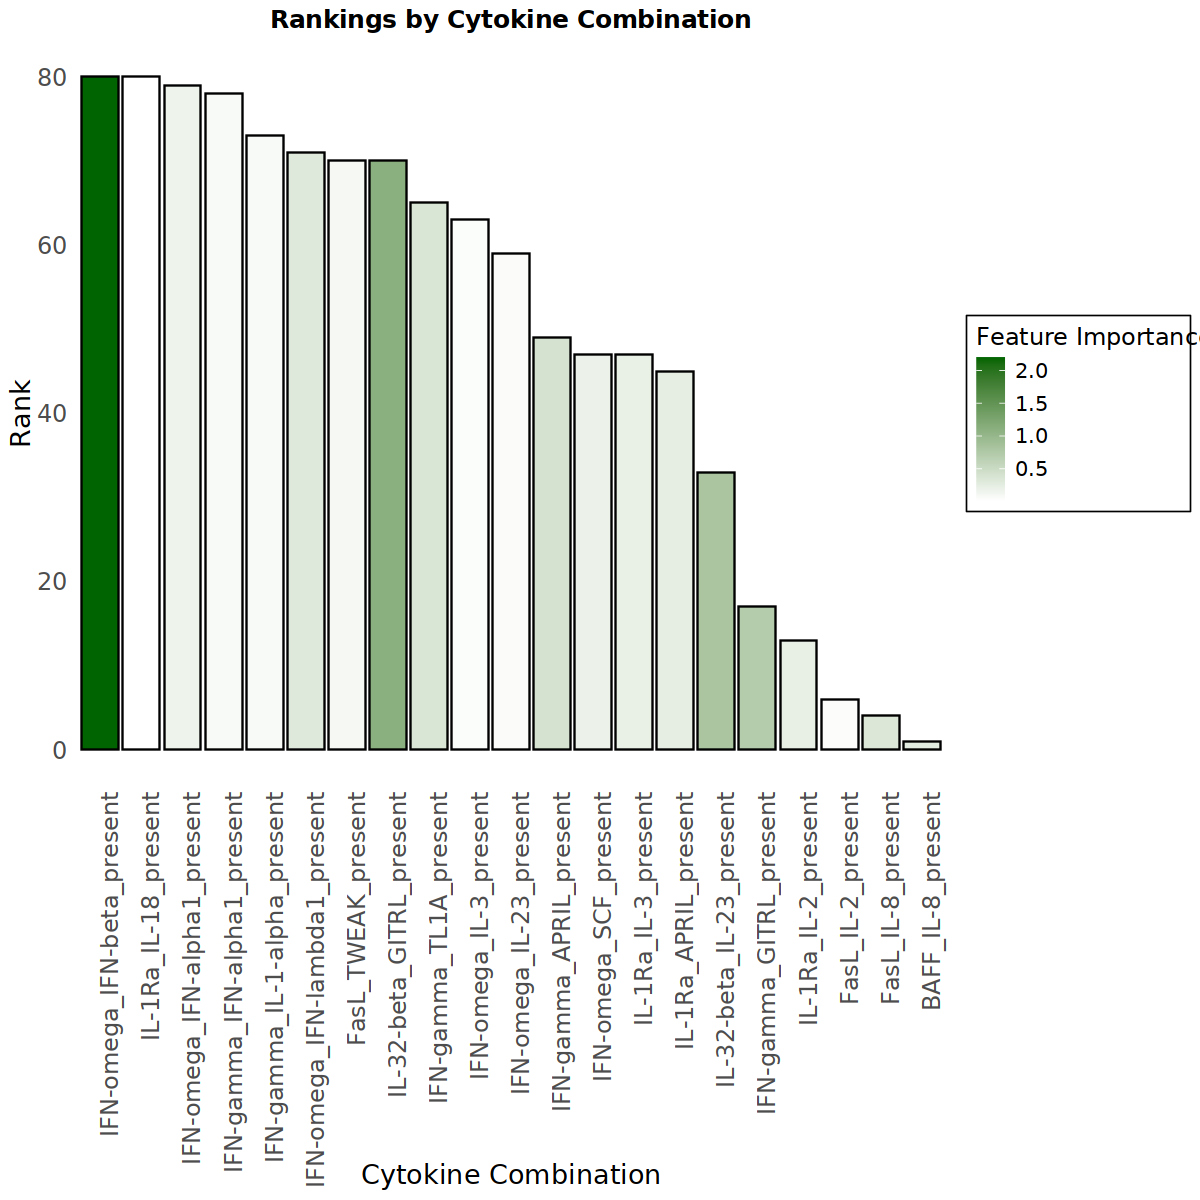

In [29]:
options(repr.plot.width = 10, repr.plot.height = 10)
white_to_green <- c("white", "darkgreen")

# Plot
p <- ggplot(df_ranks, aes(x = cyto_comb, y = rank, fill = feature_importance)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +  # Add black outlines
  scale_fill_gradientn(
    colors = white_to_green,
    name = "Feature Importance"
  ) +
  labs(
    title = "Rankings by Cytokine Combination",
    x = "Cytokine Combination",
    y = "Rank",
    fill = "Feature Importance"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.position = "right",
    legend.box.background = element_rect(color = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1),  # Rotating x-axis labels
    plot.title = element_text(hjust = 0.5, face = "bold")  # Center and bold the title
  )
p

In [30]:
ggsave(file.path(output_dir, "feature_importance_ranks.pdf"), plot = p, device = "pdf",width = 10, height = 10)